# Comparisons, Masks, and Boolean Logic

💠The use of Boolean masks to examine and manipulate values within NumPy arrays. 

💠Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion:   
**for example**, you might wish to count all values greater than a certain value, or perhaps remove all out‐liers that are above some threshold. 

💠In NumPy, Boolean masking is often the mostefficient way to accomplish these types of tasks.

# Example: Counting Rainy Days

In [4]:
import numpy as np
import pandas as pd

# using pandas to extract rainfall data
rainfall = pd.read_csv("datasets/Seattle2014.csv")['PRCP'].values

In [5]:
inches = rainfall / 254  # 1/10mm  --> inches
inches.shape

(365,)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

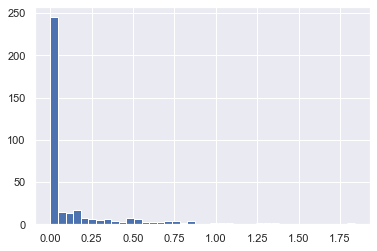

In [8]:
plt.hist(inches, 40)

## Digging into the data: Comparison Operators as ufuncs

 NumPy also implements com‐
parison operators such as < (less than) and > (greater than) as element-wise ufuncs.
The result of these comparison operators is always an array with a Boolean data type.
All six of the standard comparison operations are available:


In [9]:
x = np.array([1, 2, 3 ,4, 5, 6])

x < 3 # less than

array([ True,  True, False, False, False, False])

In [10]:
x > 3 # greater than

array([False, False, False,  True,  True,  True])

In [11]:
x <= 3 # Less than or equal to

array([ True,  True,  True, False, False, False])

In [12]:
x >= 3 # greater than or equal to

array([False, False,  True,  True,  True,  True])

In [13]:
x != 3 # not equal

array([ True,  True, False,  True,  True,  True])

In [14]:
x == 3 # equal

array([False, False,  True, False, False, False])

### Compound Expessions

In [15]:
(2 * x)  == (x ** 2)

array([False,  True, False, False, False, False])

In [16]:
rng = np.random.RandomState(0)
x = rng.randint(10,size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [17]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### Operator Equivalent ufunc    
▶️ ==   np.equal    
▶️ !=   np.not_equal    
▶️ <    np.less    
▶️ <=   np.less_equal  
▶️ >    np.greater  
▶️ >=   np.greater_equal  

## Working with Boolean Arrays

In [18]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [19]:
#how many values are less than 6 in array x
np.count_nonzero(x < 6)

8

In [21]:
np.sum(x < 6)

8

In [23]:
np.sum(x < 6, axis=0)

array([2, 2, 2, 2])

## Counting Entries

In [26]:
# are there any values greater than 8?
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [28]:
x > 8

array([[False, False, False, False],
       [False,  True, False, False],
       [False, False, False, False]])

In [27]:
np.any(x > 8)

True

In [29]:
# are there any values less than zero?
np.any(x < 0)

False

In [30]:
# are all the values less than 10?
np.all(x < 10)

True

In [31]:
# are all the values equal to 6?
np.all(x == 6)

False

## Boolean operators
This is accomplished
through Python’s bitwise logic operators, &, |, ^, and ~. Like with the standard arith‐
metic operators, NumPy overloads these as ufuncs that work element-wise on (usu‐
ally Boolean) arrays.

In [33]:
np.sum((inches > 0.5) & (inches < 1)) 
# 29 days with rainfall between 0.5 inches and 0.1 inches

29

### Operator Equivalent ufunc  
▶️ & np.bitwise_and  
▶️ | np.bitwise_or  
▶️ ^ np.bitwise_xor  
▶️ ~ np.bitwise_not  

In [34]:
print("Number of Days without Rain:       ", np.sum(inches == 0))
print("Number of Days with Rain:          ", np.sum(inches != 0))
print("Days with more than 0.5 inches:    ", np.sum(inches > 0.5))
print("Rainy Days with < 0.1 inches:      ", np.sum((inches > 0) & (inches < 0.2)))

Number of Days without Rain:        215
Number of Days with Rain:           150
Days with more than 0.5 inches:     37
Rainy Days with < 0.1 inches:       75


## Boolean Arrays as Masks

In [35]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [36]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [37]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])